In [16]:
#Pareto-optimal front(Multi-objective optimization)
#Optimize one objective function, use the min/max value for that objective function and optimize the other OF
from pyomo.environ import *
import matplotlib.pyplot as plt
import numpy as np

In [17]:
model = ConcreteModel()
model.epsilon = Param(initialize=10000, mutable=True)
model.x1 = Var(bounds=(1,2), within=NonNegativeReals)
model.x2 = Var(bounds=(1,3), within=NonNegativeReals)
model.OF1 = Var(bounds=(-10000,10000), within=NonNegativeReals)
model.OF2 = Var(bounds=(-10000,10000), within=NonNegativeReals)

model.eq1 = Constraint(expr = model.OF2 == -1.2*model.x1**2 + 5*model.x2)
#Put a limit for OF2
model.eq2 = Constraint(expr = model.OF2 <= model.epsilon)
model.eq3 = Constraint(expr = model.OF1 == 2*model.x1 - 0.5*model.x2**2)

model.obj1 = Objective(expr = model.OF1, sense = maximize)
model.obj2 = Objective(expr = model.OF2, sense = maximize)
opt = SolverFactory('ipopt')

In [18]:
#deactivate OF2
model.obj2.deactivate()
results = opt.solve(model) #solves and updates instance
print('X1 = ',round(value(model.x1), 2))
print('X2 = ',round(value(model.x2), 2))
print('obj1 = ',round(value(model.obj1), 2))
print('obj2 = ',round(value(model.obj2), 2))
#Max for OF1 is found
maxOF1 = value(model.obj1)
minOF2 = value(model.obj2)

X1 =  2.0
X2 =  1.0
obj1 =  3.5
obj2 =  0.2


In [19]:
#Deactivate OF1
model.obj1.deactivate()
model.obj2.activate()
results = opt.solve(model) #solves and updates instance
print('X1 = ',round(value(model.x1), 2))
print('X2 = ',round(value(model.x2), 2))
print('obj1 = ',round(value(model.obj1), 2))
print('obj2 = ',round(value(model.obj2), 2))
#Max of OF2 is found
minOF1 = value(model.obj1)
maxOF2 = value(model.obj2)

X1 =  1.63
X2 =  2.55
obj1 =  0.0
obj2 =  9.58


In [20]:
Nsteps = 21
X = []
Y = []
print('  x1  ',' x2 ',' OF1 ',' OF2 ',' Epsilon ')
# sequentially increase the OF2's epsilon from min value to max value and solve for OF1
for counter in range(1,Nsteps+1):
    model.epsilon = minOF2+(maxOF2-minOF2)*(counter-1)/(Nsteps-1)
    results = opt.solve(model)# solves and updates instance
    print("%5.2f"% value(model.x1), "%5.2f"% value(model.x2), "%5.2f"% value(model.obj1),"%5.2f"% value(model.obj2), "%5.2f"% value(model.epsilon))
    X.append(value(model.obj1))
    Y.append(value(model.obj2))

  x1    x2   OF1   OF2   Epsilon 
 2.00  1.00  3.50  0.20  0.20
 1.95  1.05  3.35  0.67  0.67
 1.90  1.10  3.20  1.14  1.14
 1.86  1.15  3.05  1.61  1.61
 1.81  1.20  2.90  2.08  2.08
 1.77  1.26  2.75  2.54  2.54
 1.74  1.33  2.59  3.01  3.01
 1.70  1.39  2.44  3.48  3.48
 1.67  1.46  2.28  3.95  3.95
 1.65  1.54  2.12  4.42  4.42
 1.63  1.61  1.95  4.89  4.89
 1.61  1.69  1.78  5.36  5.36
 1.59  1.77  1.61  5.83  5.83
 1.58  1.86  1.43  6.30  6.30
 1.56  1.94  1.25  6.77  6.77
 1.55  2.03  1.05  7.23  7.23
 1.54  2.11  0.86  7.70  7.70
 1.53  2.20  0.65  8.17  8.17
 1.53  2.29  0.44  8.64  8.64
 1.54  2.39  0.22  9.11  9.11
 1.63  2.55  0.00  9.58  9.58


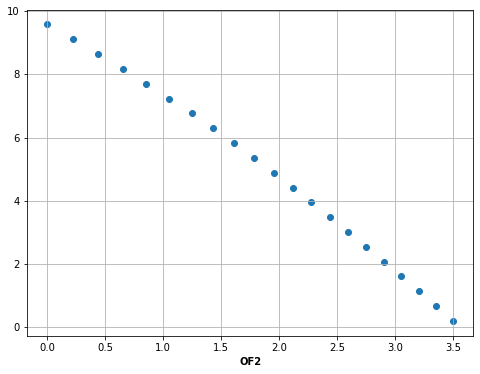

In [21]:
fig = plt.figure(figsize=(8,6))
plt.scatter(X,Y)
plt.xlabel('OF1', fontweight='bold')
plt.xlabel('OF2', fontweight='bold')
plt.grid()
plt.show()